<a href="https://colab.research.google.com/github/akuku4444/Gravitional-algorithm-notebook/blob/master/GSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravity Search Algorithm

We present GSA algorithm implemented using OOP paradigm. It is an optimization algorithm which uses Newton physics. Each part of the algorithm will be explained separately and in the end, it will be shown in class.

![alt text](https://testtubegames.com/Images/Gravity/FullGifs/208_Mesmer.gif?fbclid=IwAR0YdzaCkVNczmQ8ufcbU_hjhj8tT9FLbBjYQOyf5zkmAjWNdf4YITGFisM)




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn, randint
from numpy.linalg import norm
from IPython.display import HTML
import matplotlib.animation
import numba

## Gravity

To begin creating and testing our simple gravity we will need to declare a few things: 

In [0]:
num_of_agents = 10
dim = 2

*num_of_agents* - this is how many agents or planets will be in our universe, and *dim* is how many dimensions we will be using

In [0]:
masses = 0.0001*rand(num_of_agents)+0.00001
masses = masses.reshape(10,1)
position = np.array(randint(-10, 10, [num_of_agents, dim]))
velocity = np.zeros([num_of_agents, dim])
acceleration = np.zeros([num_of_agents, dim])
force = np.zeros((num_of_agents, dim))
G = 100

We hope first few lines (the left side) is understandable from its name.

To start our "universe " with agents we need two information: its masses and positions.  They can't be zeros, because our universe would never start!  That is why they are assigned random values. The rest is implemented as zeros because we only need a shaped array ( We will put numbers in them later).

G can be ambiguous. It is Gravitational Constant. We declare it as 100 ( not 6.67408 × 10^-(11)) because our masses will be a lot smaller than real ones. This is our universe. We can do whatever we want! (More sensible explanation is that we are not dealing with such big masses as in real universe so such small value would not work in our case )

Next function computes the force between two agents:

In [0]:
def forces_between_objects( obj1, obj2, random_value, force, masses, position):
  force[obj1] += random_value * (((G * masses[obj1] * masses[obj2]) *(position[obj2] - position[obj1])) / (norm(position[obj1] - position[obj2]) + rand()))
  return force

You can see below what this function does. Width of line conecting two agents depends on force between them. You can change masses and positions(must be run every time)

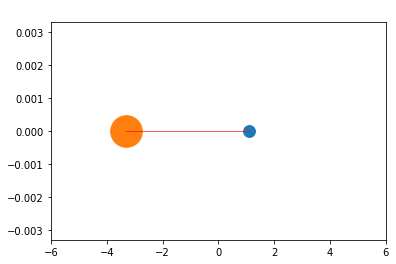

In [0]:
#@title Force visualization
mass1 = 1.4 #@param {type:"slider", min:0, max:10, step:0.1}
mass2 = 10 #@param {type:"slider", min:0, max:10, step:0.1}
position1 = 1.1 #@param {type:"slider", min:1, max:5, step:0.1}
position2 = -3.3 #@param {type:"slider", min:-5, max:-1, step:0.1}

def agentsPlot(m1, m2, p1, p2, g=100):
  r = abs(p1-p2)+rand()
  f = rand()*g * (m1 * m2)/r
  f *= 0.01
  f = np.sqrt(abs(f))
  plt.title( 'Force is '+ str(np.round(f,2)) + 'N', color = 'white')
  plt.plot((p1,p2), (0,0), color = "red", linewidth = f)
  plt.scatter(p1, 0, s=m1*100)
  plt.scatter(p2, 0, s=m2*100)
  
  plt.xlim((-6, 6))
  plt.show()
  return 

agentsPlot(mass1, mass2, position1, position2)

And this one does it for all the agents

In [0]:
def gravitional_force(force, masses, position, velocity, acceleration):
  for obj1 in range(num_of_agents):
    random_value = rand()
    for obj2 in range(num_of_agents):
      if obj1 is not obj2:
        force1 = forces_between_objects( obj1, obj2, random_value, force, masses, position)
  return force1

Below we calculate Newtonian principles of motion.As we know from physics classes acceleration is  $a\ = \frac{F}{m}$  (second law of motion). Velocity is equal *$v\ = \frac{da}{dt}$* which simplified is *$v\ = v_0 + acceleration*dt$*. we have two inconsistencies. First is multiplication by rand(). In the real world, we don't have that. Rand is number between 0-1. It brings stochastication to our algorithm. The second inconsistency is lack of multiplication by dt. dt is, of course, time period. We don't need it because our algorithm is discrete. Which means that each iteration represents one time period ( so basically dt is equal to one). 

In [0]:
def basic_forces(force,position, velocity,acceleration):
  acceleration = force / masses
  velocity = rand() * velocity + acceleration
  position = position + velocity
  return position, velocity,acceleration

Now all we need to do is put it in for loop to create our universe

In [0]:
t=0
for t in range(5):
  force = gravitional_force(force, masses, position, velocity, acceleration)
  position, velocity, acceleration = basic_forces(force, position, velocity, acceleration)
  t+=1

## See for yourself

You can see how that works on the example below. Every time a new set of data is generated, so this may be not as well showing the problem as the gifs below. Plot below shows how the animation starts so you don't have to pause and go back if you want to compare. \\
\
Just choose how many frames do you want to see and run the cell below to see the resoults! \\
*(Be aware: the more frames you want to show, the more time will it take to generate the animation)* 

Generating animated plot, please wait. It may take couple of minutes depending on the parameters...


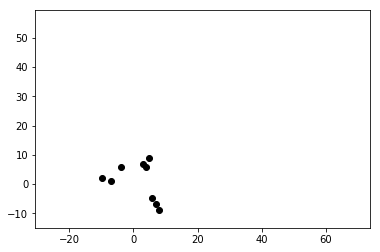

In [0]:
howManyIterations = 100 #@param {type:"integer"}
howManyAgents = 9 #@param {type:"slider", min:3, max:50, step:1}
G = 760 #@param {type:"slider", min:0, max:1000, step:10}
oneDominantMass = "no" #@param ["no", "yes"]
dominantMassMultiplication = 2 #@param {type:"slider", min:2, max:25, step:1}
num_of_agents = howManyAgents
ile = howManyIterations

def rysuj(i):
  for f in points[i]:
    plt.scatter(f[0], f[1], color = 'black')
  if oneDominantMass == "yes":
    plt.scatter(points[i][0][0], points[i][0][1], color = "red", s = 100)
  return

def zmazuj(i):
  for f in points[i]:
    plt.scatter(f[0], f[1], color = 'white', s = 5000)
  return

def findminmax(z):
  minx = 0
  miny = 0
  maxx = 0
  maxy = 0
  for t in z:
    for a in t:
      if minx >= a[0]: minx = a[0]
      if miny >= a[1]: miny = a[1]
      if maxx <= a[0]: maxx = a[0]
      if maxy <= a[1]: maxy = a[1]
  return (minx, maxx, miny, maxy)

def animate(i):
  if i is not (0, ile-1): #>=1
    zmazuj(i-1)
    rysuj(i)
  #rysuj(i)
  out.update(progress(i, ile))

print("Generating animated plot, please wait. It may take couple of minutes depending on the parameters...")

#------------------
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))
out = display(progress(0, 100), display_id=True)
#-------------------

masses = 0.0001*rand(num_of_agents)+0.00001
masses = masses.reshape(num_of_agents,1)
if oneDominantMass == "yes":
  masses[0] = max(masses) * dominantMassMultiplication
position = np.array(randint(-10, 10, [num_of_agents, dim]))
velocity = np.zeros([num_of_agents, dim])
acceleration = np.zeros([num_of_agents, dim])
force = np.zeros((num_of_agents, dim))


points = []

for krok in range (ile):
    force = gravitional_force(force, masses, position, velocity, acceleration)
    position, velocity, acceleration = basic_forces(force, position, velocity, acceleration)
    points.append(position)

fig, ax = plt.subplots()
wielkosc = findminmax(points)
#wielkosc = [-20, 20, -30, 30]
ax.axis([1.2* wielkosc[0],1.2* wielkosc[1],1.2* wielkosc[2],1.2* wielkosc[3]])
l, = ax.plot([],[], marker = 'o')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(points))
HTML(ani.to_jshtml())

## Core idea of GSA

Now its time to present the core idea of Gravitational Search algorithm. As it is said at the beginning of this notebook it is an optimization algorithm. Which means we are looking for the minimum or maximum value of some function. 






In [0]:
#@title 
from IPython.display import HTML
HTML('''<iframe src="https://drive.google.com/file/d/1aOE_X3WQY4TCPNJng_bKrCQyhz9KKE7Z/preview" width="320" height="240"></iframe>''')

We implemented basic gravitational force. Now it's time to put changes so that it can transform into our algorithm. Change is the keyword here. Because we will be changing masses of our "agents" according to how well they fit. Their fitness we will be computing on the basis of their position. Which makes sense: we are looking for a position of minimum or maximum of the function. So better position, better (bigger) mass.

In [0]:
def evaluation_function():
  temp_masses = np.ones(num_of_agents)
  evaluation_func_value = list(map(optimization_function,pos[:,:(dim-1)]))
  #best, worst = get_best_worst()
  for obj in range(num_of_agents):
    if evaluation_func_value[obj] != 0 and evaluation_func_value[obj] != worst:
      temp_masses[obj] = (evaluation_func_value[obj] - worst) / (best - worst)
  for obj in range(num_of_agents):
    masses[obj] = temp_masses[obj] / np.sum(temp_masses)


The next step is pretty simple. We are searching for the best and worst agents. Just by checking the value of  is_maximization we are defining if our best value is the highest or the lowest one. The worst value is then the opposite of the best one.

In [0]:
def get_best_worst(self):
  if not self.is_maximization:
      best = np.min(self.evaluation_func_value)
      worst = np.max(self.evaluation_func_value)
  else:
      best = np.max(self.evaluation_func_value)
      worst = np.min(self.evaluation_func_value)
  return best, worst

Our universe will age quickly. What that means is that Gravitational Constant will not be constant. (in reality, it also isn't but it changes very slowly). We will change it according to the formula below.

In [0]:
def update_G(self):
        self.G = self.grav *np.exp(-self.beta*(self.current_iteration / self.num_of_iterations) )
        self.current_iteration += 1

## Whole algorithm
Here. In the end we put everything in class. And thats it 

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import rand, randn, randint
from numpy.linalg import norm

class GravitySearchAlgorithm(object):
    def __init__(self, function, is_maximization=False, num_agents=20, iterations=1000, gravity=100, 
                 beta=20 , plot = False, show_points_and_score = True):
        self.function_level = function.__code__.co_nlocals
        self.num_of_agents = num_agents #Setting the number of agetts
        self.masses = np.zeros([self.num_of_agents, 1]) #Creating an empty mass matrix for each agent
        self.pos = np.array(randint(-10, 10, [self.num_of_agents, self.function_level]))#Drawing of starting positions
        self.velocity = np.zeros([self.num_of_agents, self.function_level]) #Creating an empty velocity matrix for each agent
        self.acceleration = np.zeros([self.num_of_agents, self.function_level])#Creating an empty acceleration matrix for each agent
        self.force = np.zeros([self.num_of_agents, self.function_level])#Creating an empty force matrix for each agent
        self.evaluation_func_value = np.zeros(self.num_of_agents) #Creating an empty scoring matrix
        self.G = 0 # initializing constant G. It will be change later in function update_G
        self.grav = gravity #Starting value  of gravitational constant
        self.current_iteration = 1
        self.num_of_iterations = iterations #Number of iterations
        self.worst_agents = np.zeros(self.num_of_agents) #Number of the worst agents
        self.n_of_worst_agents = 0
        self.number_of_bad_agents = self.num_of_agents - np.floor(self.num_of_agents/10)
        self.is_maximization = is_maximization #Declaration of minimum or maximum
        self.optimization_function = function #Function 
        self.beta = beta 
        self.plot = plot
        self.Points = np.zeros(self.function_level)
        self.Score = 0
        self.show = show_points_and_score
        self.start() #Starting the algorithm
        
    def physics(self):
        self.acceleration = self.force / self.masses #Calculation acceleration
        self.velocity = rand() * self.velocity + self.acceleration #Calculation velocity
        self.pos = self.pos + self.velocity #Calculation positions

    

    def forces_between_objects(self, obj1, obj2, random_value): #Calculation forces between agents
        self.force[obj1] += random_value * (((self.G * self.masses[obj1] * self.masses[obj2]) *
                                             (self.pos[obj2] - self.pos[obj1])) / (
                                                norm(self.pos[obj1] - self.pos[obj2]) + rand())) 

    def gravity(self): #Determining the gravity of agents
        self.force = np.zeros([self.num_of_agents, self.function_level]) #Setting all forces to zero
        for obj1 in range(self.num_of_agents):
            random_value = rand()
            for obj2 in range(self.num_of_agents):
                if obj1 is not obj2 or self.worst_agents[obj1] is True:
                    self.forces_between_objects(obj1, obj2, random_value)
                    
    def worst_agents_over_time(self): #Increasing the number of bad agents and their selection
        if self.current_iteration % (np.floor(self.num_of_iterations / (self.number_of_bad_agents - 1))) == 0:
            self.worst_agents = np.argsort(self.evaluation_func_value) >= self.n_of_worst_agents
            self.n_of_worst_agents += 1

    def evaluation_function(self):
        temp_masses = np.ones(self.num_of_agents) #Creating a temporary mass
        self.evaluation_func_value = list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])) #Calculation of the function value for each agent

        best, worst = self.get_best_worst() #Selection of the worst and higher value of the function

        for obj in range(self.num_of_agents): #Calculation of new mass for agents
            if self.evaluation_func_value[obj] != 0 and self.evaluation_func_value[obj] != worst:
                temp_masses[obj] = (self.evaluation_func_value[obj] - worst) / (best - worst)

        for obj in range(self.num_of_agents): #Change to new mass
            self.masses[obj] = temp_masses[obj] / np.sum(temp_masses)

    def get_best_worst(self): #Choosing the best and worst function value
        if not self.is_maximization: #For maximization
            best = np.min(self.evaluation_func_value) #Calculation of the best function value
            worst = np.max(self.evaluation_func_value) #Calculation of the worst function value
        else: #For minimalization
            best = np.max(self.evaluation_func_value) #Calculation of the best function value
            worst = np.min(self.evaluation_func_value) #Calculation of the worst function value
        return best, worst

    def update_G(self): #Update of the gravitational force
        self.G = self.grav *np.exp(-self.beta*(self.current_iteration / self.num_of_iterations))
        self.current_iteration += 1

    def start(self): #The function that starts the algorithm
        if self.is_maximization == False and self.show == True:
            print("Function minimalization - please wait ")
        elif self.is_maximization == True and self.show == True:
            print("Function maximalization - please wait ")
        
        update_plot = 5
        plt.figure()

        while self.num_of_iterations > self.current_iteration:
            #Calling all functions declared above
            self.evaluation_function()
            self.gravity()
            self.physics()
            self.update_G()
            
            #The code below is for plotting the algorithm's progression
            #Plotting  works of course only for functions of 2 or 3 dimentions. 
            if self.function_level == 3 and self.plot == True:
                plt.clf()
                if update_plot == 5 :
                    frame_x = np.array([np.max(self.pos[:,0]),np.min(self.pos[:,0])])
                    frame_y = np.array([np.max(self.pos[:,1]),np.min(self.pos[:,1])])
                    x = np.linspace(-5+frame_x[1],5+frame_x[0])
                    y = np.linspace(-5+frame_y[1],5+frame_y[0])
                    X, Y = np.meshgrid(x, y)
                    update_plot = 0

                update_plot += 1
                plt.contour(X, Y, self.optimization_function([X,Y]) )
                plt.scatter(self.pos[:,0], self.pos[:,1],color='red')
                plt.axis([-5+frame_x[1],5+frame_x[0], -5+frame_y[1],5+frame_y[0]])
                plt.pause(0.01)
                
            if self.function_level == 2 and self.plot == True :
                plt.clf()
                if update_plot == 5 :
                    frame_x = np.array([np.max(self.pos[:,0]),np.min(self.pos[:,0])])
                    frame_y = np.array([np.max(self.optimization_function([self.pos[:,0]])),np.min( self.optimization_function([self.pos[:,0]]))])
                    x = np.linspace(-5+frame_x[1],5+frame_x[0],500)
                    update_plot = 0
                update_plot += 1

                plt.plot(x, self.optimization_function([x]) , color = 'black',linewidth=2)
                plt.scatter(self.pos[:,0], self.optimization_function([self.pos[:,0]]),color='blue', s= 50)
                plt.axis([-5+frame_x[1],5+frame_x[0], -5+frame_y[1],5+frame_y[0]])
                plt.pause(0.01)

        if (self.function_level == 3 or self.function_level == 2) and self.plot == True :
            plt.show()            
            
        #Displaying and saving results
        if self.is_maximization == False : 
            self.Score = np.min(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))
            self.Points = self.pos[np.argmin(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))][:(self.function_level-1)]
            if self.show == True:
              print("Score: " + str(self.Score))
              print("Points: " + str(self.Points))
        else:
            self.Score = np.max(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))
            self.Points = self.pos[np.argmax(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))][:(self.function_level-1)]
            if self.show == True:
              print("Score: " + str(self.Score))
              print("Points: " + str(self.Points))


In [0]:
def function(variable):
  #Declaration of variables
  x = variable[0]
  y = variable[1]
  
  #Example of declaring more variables
  #  x = variable[0]
  #  y = variable[1]
  #  z = variable[2]
  #  c = variable[3]
  
  return x**2 + y**2  #Function

#Calling the algorithm
GravitySearchAlgorithm(function) 

#If you want get a result and save it:
# algorithm = GravitySearchAlgorithm(function) 
# points = algorithm.Points
# score = algorithm.Score

# If you want to change parameters:
# GravitySearchAlgorithm(function,is_maximization=False, num_agents=20, iterations=1000, gravity=100, beta=20 , plot = False, show_points_and_score = True)



Function minimalization - please wait 
Score: 6.225599874480798e-07
Points: [0.00059358 0.00051983]


<Figure size 432x288 with 0 Axes>

Below you can see results of above function. Please be aware that plotting can take some time. If you want faster working plotting you can run it on your machine in Pycharm IDE.  In this time you can review notebook one more time to see if everyting is clear :D 

Function minimalization - please wait 
Score: 3.1764177188649754
Points: [-0.0460722  -0.52841337]
Generating animated plot, please wait. It may take couple of minutes depending on the parameters...


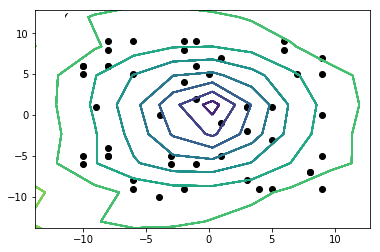

In [0]:
howManyIterations = 25 #@param {type:"integer"}
howManyAgents = 50 #@param {type:"slider", min:3, max:50, step:1}
gravityValue = 100 #@param {type:"slider", min:0, max:200, step:1}
whichFunction = "-20*e^(-0.2*sqrt(0.5*(x^2 + y^2))) - e^(0.5*(cos(2*pi*x)+cos(2*pi*y)))+e^(1)+20" #@param ["-20*e^(-0.2*sqrt(0.5*(x^2 + y^2))) - e^(0.5*(cos(2*pi*x)+cos(2*pi*y)))+e^(1)+20", "x^2 + y^2", "100*sqrt(|y-0.01*x^2|)+0.01*|x+10|", "(x+2*y-7)^2+(2*x+y-5)^2"]
wyb = {"-20*e^(-0.2*sqrt(0.5*(x^2 + y^2))) - e^(0.5*(cos(2*pi*x)+cos(2*pi*y)))+e^(1)+20" : 0,"x^2 + y^2" : 1,"100*sqrt(|y-0.01*x^2|)+0.01*|x+10|" : 2,"(x+2*y-7)^2+(2*x+y-5)^2" : 3}
#--------------------------------------

def fun1(variable):
  x = variable[0]
  y = variable[1]
  return -20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))+np.exp(1)+20

def fun2(variable):
  x = variable[0]
  y = variable[1]
  return x**2 + y**2

def fun3(variable):
  x = variable[0]
  y = variable[1]
  return 100*np.sqrt(np.abs(y-0.01*x**2))+0.01*np.abs(x+10)

def fun4(variable):
  x = variable[0]
  y = variable[1]
  return (x + 2*y - 7)**2 + (2*x + y -5)**2

funcs = [fun1, fun2, fun3, fun4]


class GSAplot(object):
    def __init__(self, function, is_maximization=False, num_agents=20, iterations=1000, gravity=100, 
                 beta=20 , plot = False, show_points_and_score = True):
        self.function_level = function.__code__.co_nlocals
        self.num_of_agents = num_agents
        self.masses = np.zeros([self.num_of_agents, 1])
        self.pos = np.array(randint(-10, 10, [self.num_of_agents, self.function_level]))
        self.posAnim = []
        self.velocity = np.zeros([self.num_of_agents, self.function_level])
        self.acceleration = np.zeros([self.num_of_agents, self.function_level])
        self.force = np.zeros([self.num_of_agents, self.function_level])
        self.evaluation_func_value = np.zeros(self.num_of_agents)
        self.G = 0 
        self.grav = gravity
        self.current_iteration = 1
        self.num_of_iterations = iterations
        self.worst_agents = np.zeros(self.num_of_agents)
        self.n_of_worst_agents = 0
        self.number_of_bad_agents = self.num_of_agents - np.floor(self.num_of_agents/10)
        self.is_maximization = is_maximization
        self.optimization_function = function
        self.beta = beta 
        self.plot = plot
        self.Points = np.zeros(self.function_level)
        self.Score = 0
        self.show = show_points_and_score
        self.start()
        
    def physics(self):
        self.acceleration = self.force / self.masses
        self.velocity = rand() * self.velocity + self.acceleration
        self.pos = self.pos + self.velocity
        self.posAnim.append(self.pos)

    def forces_between_objects(self, obj1, obj2, random_value):
        self.force[obj1] += random_value * (((self.G * self.masses[obj1] * self.masses[obj2]) *
                                             (self.pos[obj2] - self.pos[obj1])) / (
                                                norm(self.pos[obj1] - self.pos[obj2]) + rand())) 

    def gravity(self):
        self.force = np.zeros([self.num_of_agents, self.function_level])
        for obj1 in range(self.num_of_agents):
            random_value = rand()
            for obj2 in range(self.num_of_agents):
                if obj1 is not obj2 or self.worst_agents[obj1] is True:
                    self.forces_between_objects(obj1, obj2, random_value)
                    
    def worst_agents_over_time(self):
        if self.current_iteration % (np.floor(self.num_of_iterations / (self.number_of_bad_agents - 1))) == 0:
            self.worst_agents = np.argsort(self.evaluation_func_value) >= self.n_of_worst_agents
            self.n_of_worst_agents += 1

    def evaluation_function(self):
        temp_masses = np.ones(self.num_of_agents)
        self.evaluation_func_value = list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])) #Calculation of the function value for each agent

        best, worst = self.get_best_worst()

        for obj in range(self.num_of_agents):
            if self.evaluation_func_value[obj] != 0 and self.evaluation_func_value[obj] != worst:
                temp_masses[obj] = (self.evaluation_func_value[obj] - worst) / (best - worst)

        for obj in range(self.num_of_agents):
            self.masses[obj] = temp_masses[obj] / np.sum(temp_masses)

    def get_best_worst(self):
        if not self.is_maximization:
            best = np.min(self.evaluation_func_value)
            worst = np.max(self.evaluation_func_value)
        else: #For minimalization
            best = np.max(self.evaluation_func_value)
            worst = np.min(self.evaluation_func_value)
        return best, worst

    def update_G(self): #Update of the gravitational force
        self.G = self.grav *np.exp(-self.beta*(self.current_iteration / self.num_of_iterations))
        self.current_iteration += 1

    def start(self):
        if self.is_maximization == False and self.show == True:
            print("Function minimalization - please wait ")
        elif self.is_maximization == True and self.show == True:
            print("Function maximalization - please wait ")
        
        while self.num_of_iterations > self.current_iteration:
            self.evaluation_function()
            self.gravity()
            self.physics()
            self.update_G()            
            
        if self.is_maximization == False : 
            self.Score = np.min(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))
            self.Points = self.pos[np.argmin(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))][:(self.function_level-1)]
            if self.show == True:
              print("Score: " + str(self.Score))
              print("Points: " + str(self.Points))
        else:
            self.Score = np.max(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))
            self.Points = self.pos[np.argmax(list(map(self.optimization_function,self.pos[:,:(self.function_level-1)])))][:(self.function_level-1)]
            if self.show == True:
              print("Score: " + str(self.Score))
              print("Points: " + str(self.Points))

#--------------------------------------
w = GSAplot(funcs[wyb[whichFunction]], num_agents = howManyAgents, iterations = howManyIterations, gravity = gravityValue)
print("Generating animated plot, please wait. It may take couple of minutes depending on the parameters...")
wielkosc = findminmax(points)
x = np.linspace(10*wielkosc[0],10*wielkosc[1],100)
y = np.linspace(10*wielkosc[2],10*wielkosc[3],100)
X,Y = np.meshgrid(x,y)
fun = funcs[wyb[whichFunction]]
z = fun([X,Y])
def rysuj(i):
  plt.contour(X,Y, z,levels = 10)
  for f in points[i]:
    plt.scatter(f[0], f[1], color = 'black')
  

def zmazuj(i):
  
  for f in points[i]:
    plt.scatter(f[0], f[1], color = 'white', s = 5000)
  

def findminmax(z):
  minx = 0
  miny = 0
  maxx = 0
  maxy = 0
  for t in z:
    for a in t:
      if minx >= a[0]: minx = a[0]
      if miny >= a[1]: miny = a[1]
      if maxx <= a[0]: maxx = a[0]
      if maxy <= a[1]: maxy = a[1]
  return (minx, maxx, miny, maxy)


@numba.jit
def animate(i):
  if i is not (0, howManyIterations-1): #>=1
    maxx = np.max(points[i][:,0])
    minx = np.min(points[i][:,0])
    maxy = np.max(points[i][:,1])
    miny = np.min(points[i][:,1])
    
    odlx = maxx - minx
    odly = maxy - miny
    ax.axis([minx-0.2*odlx,maxx+0.2*odlx,miny-0.2*odly,maxy+0.2*odly])
    zmazuj(i)
    rysuj(i) 
  out.update(progress(i, howManyIterations))

#------------------
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))
out = display(progress(0, 100), display_id=True)
#-------------------


points = []
for i in range(howManyIterations-1):
  points.append(w.posAnim[i])


fig, ax = plt.subplots()

ax.axis([1.2* wielkosc[0],1.2* wielkosc[1],1.2* wielkosc[2],1.2* wielkosc[3]])
l, = ax.plot([],[], marker = 'o')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(points))
HTML(ani.to_jshtml())

As you can see from total randomness function foun

##AFTERTHOUGHTS##


As the last part of this notebook, we will present a comparison with another algorithm with similar nature.

## GSA and PSO comparison on different functions

We applied GSA for some functions and compared the results with those of  PSO. PSO stands for Particle Swarm Optimization. It is the most known nature-inspired algorithm.  In all cases, population size is set to 30 (N = 30). Maximum iteration is 1000 and the search area is between -100 and 100 for all functions.
In GSA, Gravity value is set to 100 and Beta is set to 20.
In PSO, C1 = 0.5, C2 = 0.1 and inertia factor (W) is decreasing linearly from 0.5 to 0.1.

The global optimum is zero for all functions.

(1) Function : (Ackley Function) 
```
-20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))+np.exp(1)+20
```
(2) Function :
```
x**2 + y**2
```

(3) Function : (Bukin Function N. 6)
```
100*np.sqrt(np.abs(y-0.01*x**2))+0.01*np.abs(x+10)
```

(4) Function : (Booth Function)
```
(x + 2*y - 7)**2 + (2*x + y -5)**2
```


On the left the graph shows average mean fitness in subsequent iterations.

On the right the graph shows how function look like.

In [0]:
#@title GSA and PSO comparison #Function(1)
from IPython.display import HTML

HTML('''<iframe src="https://drive.google.com/file/d/1YE7TzeY5sf6h8AYpdpXr2TkfzUqNnBbs/preview" width="320" height="240"" ></iframe>, <iframe src="https://drive.google.com/file/d/1_nHUC8IVlpZ8vf4p_MsTtdIPqzfzbvsp/preview" width="320" height="240""></iframe>''')



In [0]:
#@title  GSA and PSO comparison #Function(2)
HTML('''<iframe src="https://drive.google.com/file/d/1ywE2SwjW423rffLORcGb5zSlmvIFWrku/preview" width="320" height="240"></iframe>,<iframe src="https://drive.google.com/file/d/1ZlGiFC67x4xEmu7jGkIWP6n1Xz09hpEr/preview" width="360" height="240"></iframe>''')

In [0]:
#@title GSA and PSO comparison #Function(3)
HTML('''<iframe src="https://drive.google.com/file/d/1R9oR3zWIMjmIRSt3CHuutxomOV6nld8p/preview" width="320" height="240"></iframe>,<iframe src="https://drive.google.com/file/d/1ra0TipsOjc9-ZCjZQhbJRHX3Ca9OtHNY/preview" width="320" height="240"></iframe>''')

In [0]:
#@title GSA and PSO comparison #Function(4)
HTML('''<iframe src="https://drive.google.com/file/d/1fz4THGRpl2UD-gcufMi6QkCKziCb4oxv/preview" width="320" height="240"></iframe>,<iframe src="https://drive.google.com/file/d/1QkEuThm64mxcThkiP3F6YtyrhRdlpGL8/preview" width="320" height="240"></iframe>''')

In [0]:
#@title Time compraison
HTML('''<iframe src="https://drive.google.com/file/d/129beG28jv6_hW6SfFDP8IXPqJlMCfkIp/preview" width="320" height="240"></iframe>''')

As we can see two algorithms perform preatty simmlarly on those functions. So there is no big advantage of GSA. Time of ten iterations  is much worse for GSA  but  this implementation of PSO is much more optimized. One big adventage of GSA is that it is much simmpler to implement than PSO. 

##THE END##


We hope that this notebook was helpfull. 
This notebook was created by: \
Michał Krępuła \
Albert Nowak\
Joanna Urbaniak \
as Team Project at Wroclaw University of Science and Technology 
under scientific and educational guidance of dr inż. Jarosław Drapała. \
If you have any questions or sugestion please contact as via e-mail akuku4444@gmail.com or via Github. 
 